In [1]:
import pandas as pd
import sqlite3

## 1. Make a connection to the database (it is the same as the previous day)

In [2]:
con = sqlite3.connect('../data/checking-logs.sqlite')

## 2. Run a query that gets the datetime from the pageviews table, selecting only the users and not the admins

In [3]:
pd.read_sql('SELECT * FROM pageviews LIMIT 7;', con)

,index,uid,datetime
0,0,admin_1,2020-04-17 12:01:08.463179
1,1,admin_1,2020-04-17 12:01:23.743946
2,2,admin_3,2020-04-17 12:17:39.287778
3,3,admin_3,2020-04-17 12:17:40.001768
4,4,admin_1,2020-04-17 12:27:30.646665
5,5,admin_1,2020-04-17 12:35:44.884757
6,6,admin_1,2020-04-17 12:35:52.735016


In [4]:
query_datetime = """
SELECT datetime
FROM pageviews
WHERE uid NOT LIKE 'admin_%'
"""    

In [5]:
pd.read_sql(query_datetime, con)

,datetime
0,2020-04-17 22:46:26.785035
1,2020-04-18 10:53:52.623447
2,2020-04-18 10:56:55.833899
3,2020-04-18 10:57:37.331258
4,2020-04-18 12:05:48.200144
...,...
982,2020-05-21 18:45:20.441142
983,2020-05-21 23:03:06.457819
984,2020-05-21 23:23:49.995349
985,2020-05-22 11:30:18.368990


## 3. Using Pandas, create a new dataframe where the visits are counted and grouped by date

In [6]:
query_visits_counts = """
SELECT 
    date(datetime) AS date,
    COUNT(*) AS visits
FROM pageviews
WHERE uid NOT LIKE 'admin_%'
GROUP BY date
"""

In [7]:
df_visits = pd.read_sql(query_visits_counts, con, index_col='date')
display(df_visits)
display(df_visits.shape)

,visits
date,
2020-04-17,1
2020-04-18,23
2020-04-19,15
2020-04-21,3
2020-04-22,1
2020-04-23,5
2020-04-25,1
2020-04-26,8
2020-04-28,2


(33, 1)

## 4. Using Pandas method .plot(), create a graph

<Axes: title={'center': 'Views per day'}, xlabel='date'>

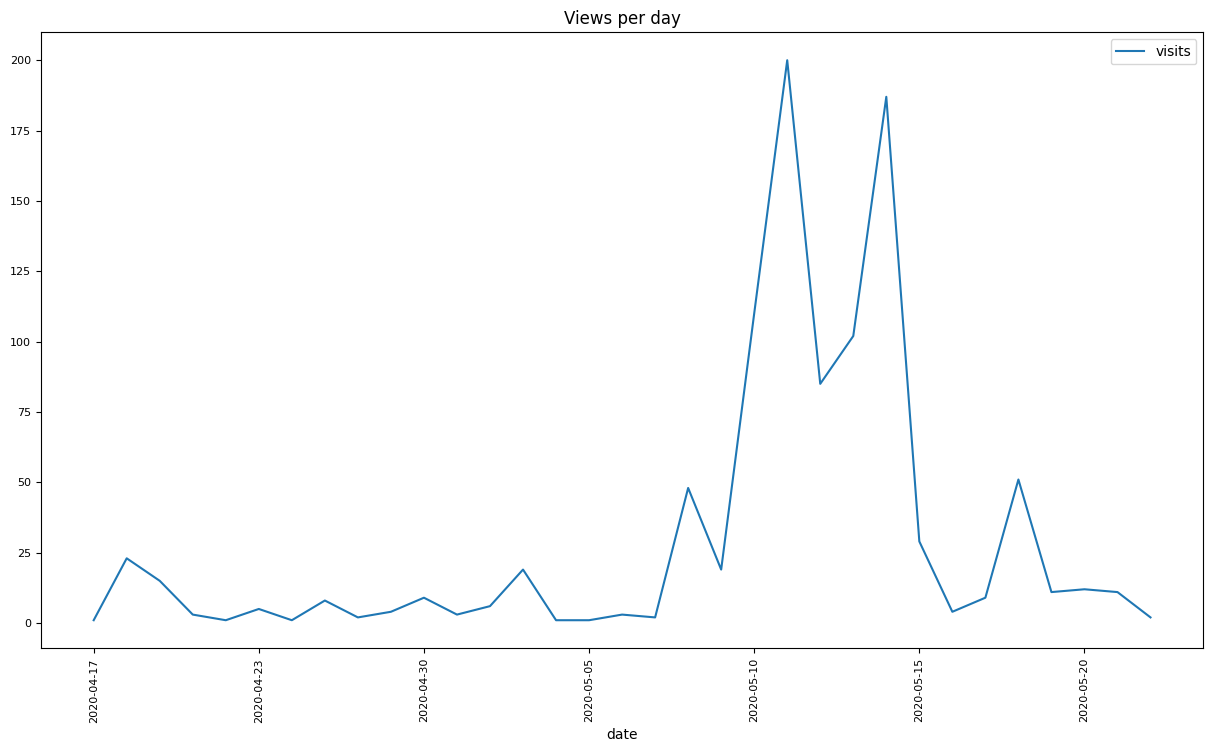

In [8]:
df_visits.plot(title='Views per day', fontsize=8, figsize=(15,8), rot=90)

In [9]:
con.close()